In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
file_path = "/content/sample_course_enrollments.csv"
df = pd.read_csv("/content/sample_course_enrollments.csv")
df['EnrollDate'] = pd.to_datetime(df['EnrollDate'])
df['Year'] = df['EnrollDate'].dt.year
df['Month'] = df['EnrollDate'].dt.month
df['MonthName'] = df['Month'].apply(lambda x: calendar.month_abbr[x])


In [ ]:
category_summary = df.groupby("Category")["CourseName"].count().reset_index().rename(columns={"CourseName":"Enrollments"})
top_category = category_summary.sort_values("Enrollments", ascending=False).iloc[0]


In [ ]:
course_summary = df.groupby("CourseName")["Category"].count().reset_index().rename(columns={"Category":"Enrollments"})
top_course = course_summary.sort_values("Enrollments", ascending=False).iloc[0]


In [ ]:
monthly_summary = df.groupby(["Year", "MonthName"])["CourseName"].count().reset_index().rename(columns={"CourseName":"Enrollments"})
peak_month = monthly_summary.sort_values("Enrollments", ascending=False).iloc[0]


<Axes: xlabel='Category', ylabel='Enrollments'>

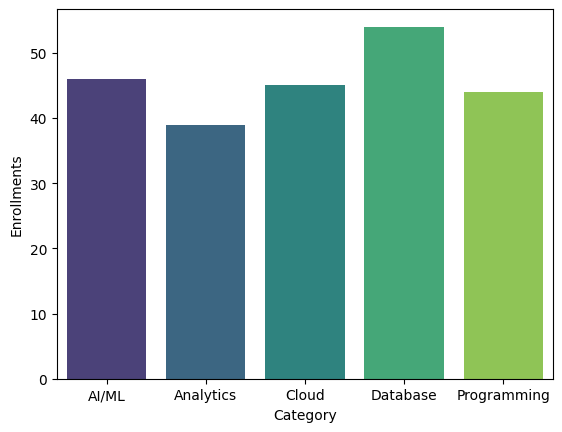

In [ ]:
sns.barplot(
    data=category_summary,
    x="Category",
    y="Enrollments",
    hue="Category",
    legend=False,
    palette="viridis"
)

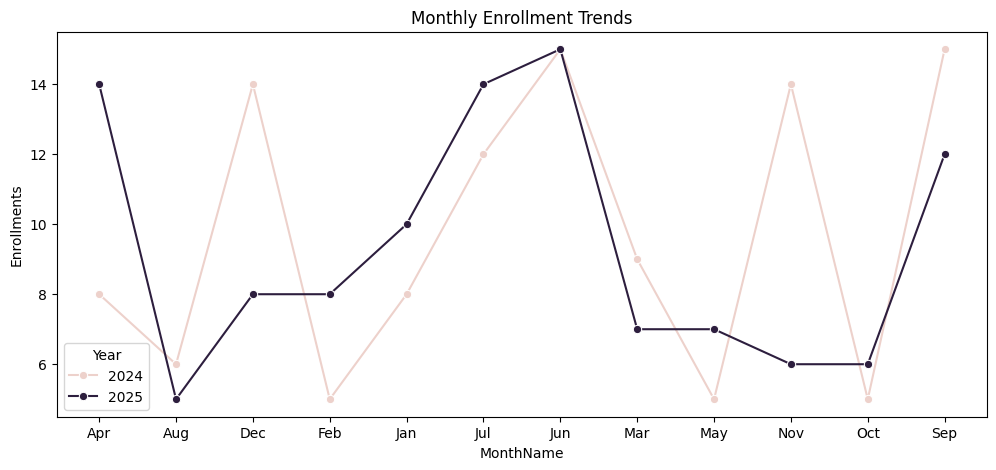

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_summary, x="MonthName", y="Enrollments", hue="Year", marker="o")
plt.title("Monthly Enrollment Trends")
plt.show()

<Axes: xlabel='CourseName', ylabel='Enrollments'>

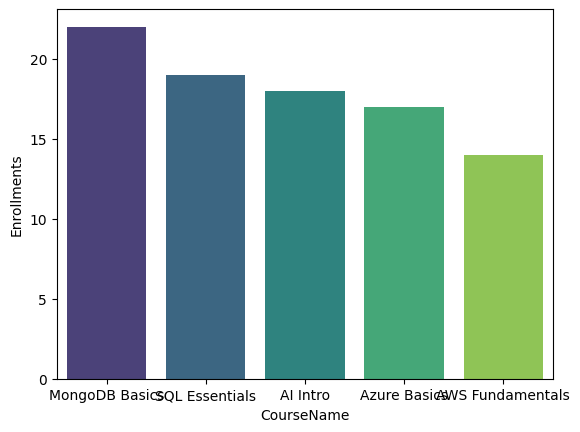

In [ ]:
sns.barplot(
    data=course_summary.sort_values("Enrollments", ascending=False).head(5),
    x="CourseName",
    y="Enrollments",
    hue="CourseName",
    legend=False,
    palette="viridis"
)